<a href="https://colab.research.google.com/github/sujayrittikar/NLP_Basics/blob/main/sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

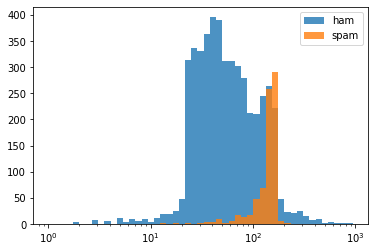

In [9]:
import matplotlib.pyplot as plt

plt.xscale('log')
bins = 1.15**(np.arange(0, 50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'], bins=bins, alpha=0.8)
plt.legend(('ham', 'spam'))
plt.show()

- Spam messages tend to be longer compared to Ham

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# X feature data
X = df[['length', 'punct']]
# y is label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
X_train.shape

(3900, 2)

In [13]:
X_test.shape

(1672, 2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr_model = LogisticRegression(solver='lbfgs')

In [17]:
lr_model.fit(X=X_train, y=y_train)

LogisticRegression()

In [18]:
from sklearn import metrics

In [20]:
predictions = lr_model.predict(X_test)

In [21]:
print(metrics.confusion_matrix(y_test, predictions))

[[1393   49]
 [ 226    4]]


In [22]:
df = pd.DataFrame(metrics.confusion_matrix(y_test, predictions))

In [23]:
df

,0,1
0,1393,49
1,226,4


In [24]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.86      0.97      0.91      1442
        spam       0.08      0.02      0.03       230

    accuracy                           0.84      1672
   macro avg       0.47      0.49      0.47      1672
weighted avg       0.75      0.84      0.79      1672



These results are not good when it comes to detecting spam text messages.

In [25]:
print(metrics.accuracy_score(y_test, predictions))

0.8355263157894737


In [27]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [28]:
nb_model.fit(X_train, y_train)

MultinomialNB()

In [29]:
predictions = nb_model.predict(X_test)

In [30]:
print(metrics.confusion_matrix(y_test, predictions))

[[1437    5]
 [ 227    3]]


In [31]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.86      1.00      0.93      1442
        spam       0.38      0.01      0.03       230

    accuracy                           0.86      1672
   macro avg       0.62      0.50      0.48      1672
weighted avg       0.80      0.86      0.80      1672



In [32]:
from sklearn.svm import SVC
svc_model = SVC()

In [33]:
svc_model.fit(X_train, y_train)

SVC()

In [34]:
predictions = svc_model.predict(X_test)

In [35]:
print(metrics.confusion_matrix(y_test, predictions))

[[1355   87]
 [ 119  111]]
